In [ ]:
pip install nltk


In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df=pd.read_csv('MeToo_tweets.csv')

In [ ]:
df.head(300)

,Text,Id,Lenght,Created_at,Source,Favorite_count,Retweet_count,Lang
0,"@Rightsatbirth: ""What he did was manipulative...",1.184600e+18,140,10/16/2019 22:33,Twitter for Android,0,2,en
1,Happy 94th Birthday\0\x9f\x8e\x82 to @_AngelaL...,1.184600e+18,144,10/16/2019 22:33,Twitter for iPhone,0,0,en
2,@RepLoriTrahan: Two years ago #MeToo woke up ...,1.184600e+18,139,10/16/2019 22:33,Twitter for iPhone,0,36,en
3,@RituG15: #TimesUp #MeTooVoter #MenToo #Meto...,1.184600e+18,139,10/16/2019 22:33,Twitter for Android,0,7,en
4,@ambertamblyn: Months before MeToo broke us w...,1.184600e+18,140,10/16/2019 22:33,Twitter for iPhone,0,161,en
...,...,...,...,...,...,...,...,...
295,@TransLawCenter: Trans women and femmes are a...,1.184590e+18,140,10/16/2019 21:47,Twitter for iPhone,0,51,en
296,@queenbpip: Justice For Johnny Depp: A Thread...,1.184590e+18,140,10/16/2019 21:47,Twitter for iPhone,0,108,en
297,@majesticmayaaa: Dear @TaranaBurke this 42 ye...,1.184590e+18,139,10/16/2019 21:47,Twitter for iPhone,0,324,en
298,@ShannonTracy123: In the midst of the #metoo ...,1.184590e+18,140,10/16/2019 21:47,Twitter for iPhone,0,10,en


In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()


0

In [ ]:
print(df.shape)

(14333, 8)


In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')

def cleantext(text):

    text = re.sub(r"@[0-9a-zA-Z]+", "", text)

    text = re.sub(r"#", "", text)

    text = re.sub(r"https?:\\/\\/\\S+", "", text)

    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Remove emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F700-\U0001F77F"
                           u"\U0001F780-\U0001F7FF"
                           u"\U0001F800-\U0001F8FF"
                           u"\U0001F900-\U0001F9FF"
                           u"\U0001FA00-\U0001FA6F"
                           u"\U0001FA70-\U0001FAFF"
                           u"\U0001FB00-\U0001FBFF"
                           u"\U0001FC00-\U0001FCFF"
                           u"\U0001FD00-\U0001FDFF"
                           u"\U0001FE00-\U0001FEFF"
                           u"\U0001FF00-\U0001FFFF"
                           "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', text)


    words = text.split()


    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]


    text = ' '.join(words)

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Text_clean'] = df['Text'].apply(cleantext)


In [ ]:
column_names = df.columns

In [ ]:
print(column_names)

Index(['Text', 'Id', 'Lenght', 'Created_at', 'Source', 'Favorite_count',
       'Retweet_count', 'Lang', 'Text_clean'],
      dtype='object')


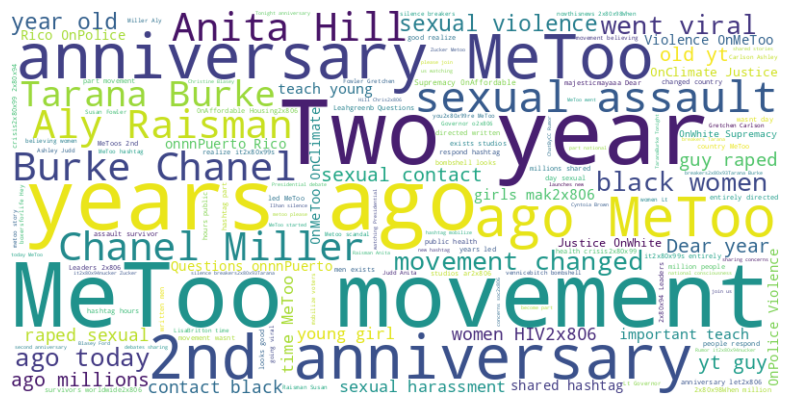

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text_data = ' '.join(df['Text_clean'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df.head(600)

,Text,Id,Lenght,Created_at,Source,Favorite_count,Retweet_count,Lang,Text_clean
0,"@Rightsatbirth: ""What he did was manipulative...",1.184600e+18,140,10/16/2019 22:33,Twitter for Android,0,2,en,manipulative dishonest coercive Coerced sex is...
1,Happy 94th Birthday\0\x9f\x8e\x82 to @_AngelaL...,1.184600e+18,144,10/16/2019 22:33,Twitter for iPhone,0,0,en,Happy 94th Birthday0x9fx8ex82 AngelaLansbury B...
2,@RepLoriTrahan: Two years ago #MeToo woke up ...,1.184600e+18,139,10/16/2019 22:33,Twitter for iPhone,0,36,en,Two years ago MeToo woke nation become part na...
3,@RituG15: #TimesUp #MeTooVoter #MenToo #Meto...,1.184600e+18,139,10/16/2019 22:33,Twitter for Android,0,7,en,TimesUp MeTooVoter MenToo Metoo Brexit Wednesd...
4,@ambertamblyn: Months before MeToo broke us w...,1.184600e+18,140,10/16/2019 22:33,Twitter for iPhone,0,161,en,Months MeToo broke us wide open man tapped sho...
...,...,...,...,...,...,...,...,...,...
605,brianlilley @gmbutts @JustinTrudeau Were you p...,1.184580e+18,140,10/16/2019 21:04,Twitter for iPhone,0,0,en,brianlilley proud learn ethics violations prou...
606,So happy to finally on Twitter ! #Blogger #met...,1.184580e+18,72,10/16/2019 21:03,Twitter for iPhone,0,0,en,happy finally Twitter Blogger metoo mentalheal...
607,I mentioned #MeToo in class today and a studen...,1.184580e+18,140,10/16/2019 21:03,Twitter Web App,2,0,en,mentioned MeToo class today student said Whats...
608,@manny_ottawa: What a year on twitter- I2\x80...,1.184580e+18,140,10/16/2019 21:03,Twitter Web Client,0,100,en,ottawa year twitter I2x80x99ve seennnLiberaln1...


In [ ]:
text_data = df['Text_clean'].tolist()


In [ ]:
from nltk.tokenize import word_tokenize


In [ ]:
tokenized_texts = [word_tokenize(text.lower()) for text in text_data]


In [ ]:
df['Tokenized_Text'] = tokenized_texts


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

tokenized_texts = df['Tokenized_Text'].apply(lambda tokens: ' '.join(tokens)).tolist()

# Count Vectorization
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(tokenized_texts)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_texts)

# LDA Modeling
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=20, random_state=42)

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()


print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words=10)


Topic #1:
metoo women important guy year also black sexual time raped

Topic #2:
metoo anniversary taranaburke sexual us tonight violence join please presidential

Topic #3:
metoo sexual women amp x806 movement it2x80x99s harassment violence since

Topic #4:
metoo women movement o2x806 you2x80x99re since governor hey lt believing

Topic #5:
metoo read man said us i2x806 open broke oped months

Topic #6:
metoo sexual movement assault years day survivors wasnt 2017 led

Topic #7:
metoo it2x80x99s men good looks written ar2x806 bombshell directed exists

Topic #8:
metoo stories story told world remember an2x806 keep asked secular

Topic #9:
justice violence questions supremacy 0nwhite 0nmetoo 0npolice onnnpuerto rico 0nclimate

Topic #10:
metoo years movement ago two part changed anniversary 2nd millions

Topic #11:
metoo movement women help theres kind stories victims stop marginalized

Topic #12:
metoo amp people new left it2x80x99s political take fake and2x806

Topic #13:
metoo amp que

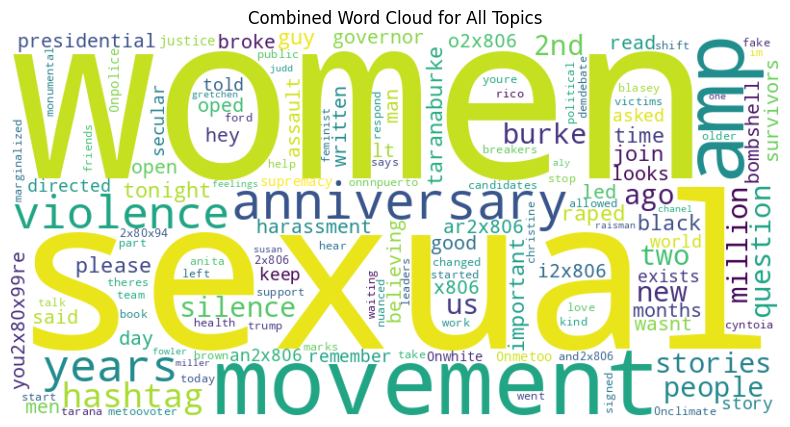

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


words_to_exclude = ["2x80x94 ", "2x806 ", "don2x80x99t","it2x80x99s","it2x80x99s","it2x80x99s","me too", "metoo","year"]


feature_names = vectorizer.get_feature_names_out()

# Extracting topics and their associated words from the LDA model
all_keywords = []
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10-1:-1]
    top_keywords = [feature_names[i] for i in top_keywords_idx if feature_names[i] not in words_to_exclude]
    all_keywords.extend(top_keywords)

# Creating a WordCloud for all topics
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_keywords))


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Combined Word Cloud for All Topics")
plt.axis("off")
plt.show()


In [ ]:
df.head(600)


,Text,Id,Lenght,Created_at,Source,Favorite_count,Retweet_count,Lang,Text_clean,Tokenized_Text
0,"@Rightsatbirth: ""What he did was manipulative...",1.184600e+18,140,10/16/2019 22:33,Twitter for Android,0,2,en,manipulative dishonest coercive Coerced sex is...,"[manipulative, dishonest, coercive, coerced, s..."
1,Happy 94th Birthday\0\x9f\x8e\x82 to @_AngelaL...,1.184600e+18,144,10/16/2019 22:33,Twitter for iPhone,0,0,en,Happy 94th Birthday0x9fx8ex82 AngelaLansbury B...,"[happy, 94th, birthday0x9fx8ex82, angelalansbu..."
2,@RepLoriTrahan: Two years ago #MeToo woke up ...,1.184600e+18,139,10/16/2019 22:33,Twitter for iPhone,0,36,en,Two years ago MeToo woke nation become part na...,"[two, years, ago, metoo, woke, nation, become,..."
3,@RituG15: #TimesUp #MeTooVoter #MenToo #Meto...,1.184600e+18,139,10/16/2019 22:33,Twitter for Android,0,7,en,TimesUp MeTooVoter MenToo Metoo Brexit Wednesd...,"[timesup, metoovoter, mentoo, metoo, brexit, w..."
4,@ambertamblyn: Months before MeToo broke us w...,1.184600e+18,140,10/16/2019 22:33,Twitter for iPhone,0,161,en,Months MeToo broke us wide open man tapped sho...,"[months, metoo, broke, us, wide, open, man, ta..."
...,...,...,...,...,...,...,...,...,...,...
605,brianlilley @gmbutts @JustinTrudeau Were you p...,1.184580e+18,140,10/16/2019 21:04,Twitter for iPhone,0,0,en,brianlilley proud learn ethics violations prou...,"[brianlilley, proud, learn, ethics, violations..."
606,So happy to finally on Twitter ! #Blogger #met...,1.184580e+18,72,10/16/2019 21:03,Twitter for iPhone,0,0,en,happy finally Twitter Blogger metoo mentalheal...,"[happy, finally, twitter, blogger, metoo, ment..."
607,I mentioned #MeToo in class today and a studen...,1.184580e+18,140,10/16/2019 21:03,Twitter Web App,2,0,en,mentioned MeToo class today student said Whats...,"[mentioned, metoo, class, today, student, said..."
608,@manny_ottawa: What a year on twitter- I2\x80...,1.184580e+18,140,10/16/2019 21:03,Twitter Web Client,0,100,en,ottawa year twitter I2x80x99ve seennnLiberaln1...,"[ottawa, year, twitter, i2x80x99ve, seennnlibe..."


In [ ]:

db['screenname_mentioned'] = db['Text'].apply(lambda x: re.findall(r'@(\w+)', str(x)))


all_mentioned_screennames = [screenname for sublist in db['screenname_mentioned'] for screenname in sublist]

# Calculate influence based on retweets, likes, and replies
db['influence'] = db['Retweet_count'] + db['Favorite_count'].notnull().astype(int)

# Identify the most influential user by mentioned screen name
most_mentioned_screenname = max(set(all_mentioned_screennames), key=all_mentioned_screennames.count)
most_influential_user = db[db['screenname_mentioned'].apply(lambda x: most_mentioned_screenname in x)].iloc[0]


db_sorted = db.sort_values(by='Retweet_count', ascending=False)

print("Most Influential User:")
print("Mentioned Screen Name:", most_mentioned_screenname)
print("Retweets:", most_influential_user['Retweet_count'])



print("\nTop Tweets Sorted by Retweet Count:")
print(db_sorted[['Text', 'Retweet_count']].head())

NameError: name 'db' is not defined